# Lab 4

## Ex 1

In [1]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




### Point 1.a

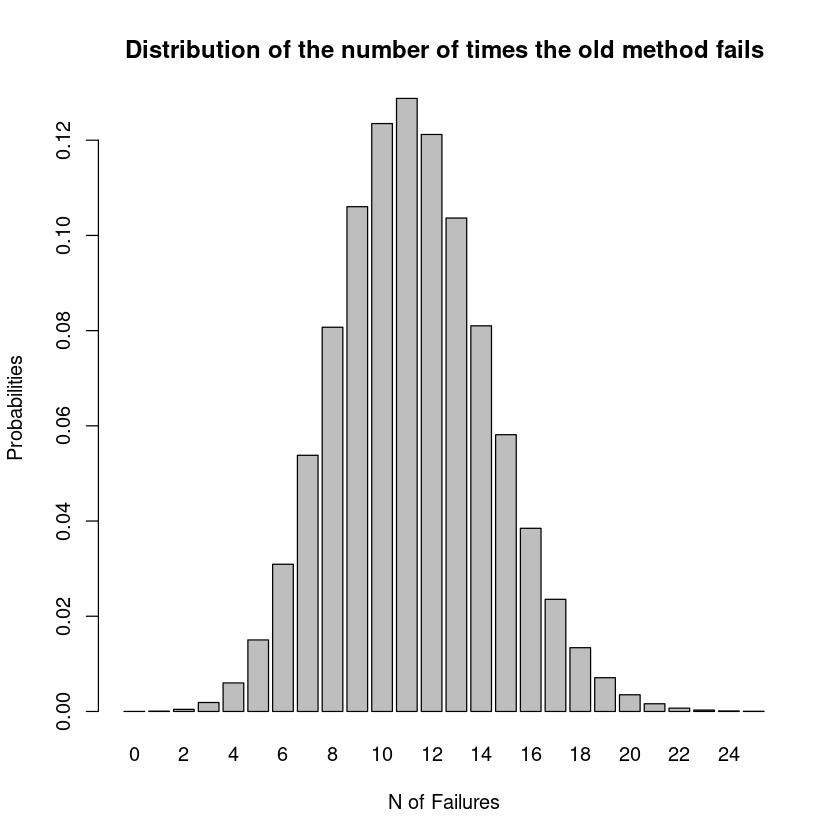

In [2]:
n<- 75
p<- 15/100
x<- 0:25
y<- dbinom(x,n,p)
barplot(y,
        names=x,
        main="Distribution of the number of times the old method fails",
        xlab= "N of Failures",
        ylab= "Probabilities")
     

### Point 1.b

In [3]:
y <- 6
n <- 75

p <- y / n
cat("Frequentist Estimator of Failure Probability:", p)


Frequentist Estimator of Failure Probability: 0.08

### Point 1.c

We know that having a beta prior and measuring y "successes" in n trials we get a beta posterior with parameters $a'=a+y$ and $b'=b+n-y$ where $a$ and $b$ are the parameters of the prior.


Mean:  0.08478674
Variance:  0.0009520625
Standard Deviation:  0.03085551

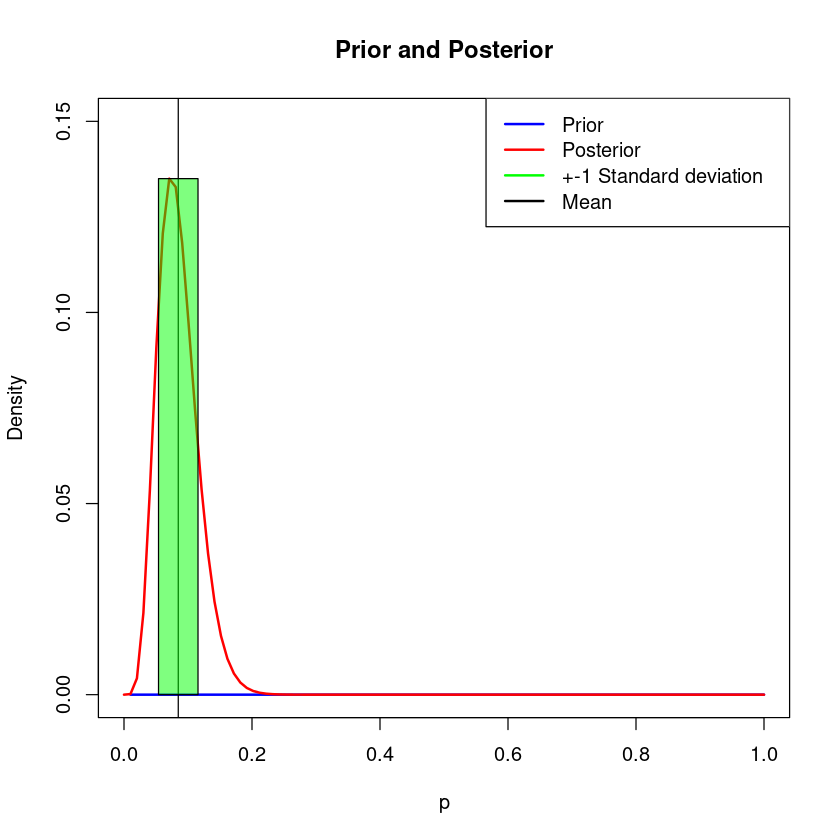

In [4]:
mean_prior <- 0.15
sd_prior <- 0.14
p <- seq(0, 1, length.out = 100)

var_prior <- sd_prior^2
alpha_prior <- ((1 - mean_prior) / var_prior - 1 / mean_prior) * mean_prior^2
beta_prior <- alpha_prior * (1 / mean_prior - 1)

alpha_post <- alpha_prior + y
beta_post <- beta_prior + n - y

prior <- dbeta(p, alpha_prior, beta_prior)/sum(dbeta(p, alpha_prior, beta_prior))
posterior <- dbeta(p, alpha_post, beta_post)/sum(dbeta(p, alpha_post, beta_post))

posterior_mean <- alpha_post / (alpha_post + beta_post)
posterior_var <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))
posterior_std <- sqrt(posterior_var)

#plotting prior and posterior
plot(p, prior, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Prior and Posterior",ylim = c(0, 0.15))
lines(p, posterior, col = "red", lwd = 2)
abline(v=posterior_mean,col="black")
rect(xleft = posterior_mean-posterior_std,xright = posterior_mean+posterior_std,ybottom = 0,ytop = max(posterior) ,col=rgb(0,1.,0,alpha=0.5))

legend("topright", legend = c("Prior", "Posterior","+-1 Standard deviation","Mean"), col = c("blue", "red","green","black"), lwd = 2)
cat("\nMean: ",posterior_mean)
cat("\nVariance: ",posterior_var)
cat("\nStandard Deviation: ",posterior_std)


### Point 1.d

In [5]:
prob_greater_15 <- 1 - pbeta(0.15, alpha_post, beta_post)
cat("Probability that failure rate >= 0.15:", prob_greater_15,"\n")

if (prob_greater_15 < 0.05) {
  cat("The new method is better than the traditional method within 5% confidence.")
} else {
  cat("The new method is not better than the traditional method within 5% confidence.")
}
#or i can also integrate the posterior from 0.15 to 1

Probability that failure rate >= 0.15: 0.03127933 
The new method is better than the traditional method within 5% confidence.

### Point 1.e

In [6]:
result<-dbinom(6,size=n,prob=0.15)

if (result < 0.05) {
  cat("The new method is better than the traditional method within 5% confidence.")
} else {
  cat("The new method is not better than the traditional method within 5% confidence.")
}


The new method is better than the traditional method within 5% confidence.

## Ex2

### Point 2.a

In [7]:
# data
data<-c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78,
4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)
n<-length(data)
var_th<-4
mu<-seq(0.01,10,0.01)

In [8]:
step_function <- function(value) {
  ifelse(0 < value & value <= 3, value,
         ifelse(3 < value & value <= 5, 3,
                ifelse(5 < value & value <= 8, 8 - value,
                       ifelse(value > 8, 0, NA))))
}

# calculate posterior
prior <- step_function(mu)/(sum(step_function(mu)))
original_prior<-prior
for (i in 1:n){
       likelihood <- dnorm(data[i],mean = mu,sd = sqrt(var_th))/sum(dnorm(data[i],mean = mu,sd = sqrt(var_th)))
       norm <- sum(prior*likelihood)
       posterior <- prior*likelihood/norm
       prior <- posterior
}

In [9]:
mean<-wtd.mean(mu,posterior)
std<-sqrt(wtd.var(mu,posterior,normwt=TRUE))

cat("The posterior mean is: ",wtd.mean(mu,posterior))
cat("\nThe posterior standard deviation is: ",sqrt(wtd.var(mu,posterior,normwt = TRUE)))

The posterior mean is:  4.725188
The posterior standard deviation is:  0.4852065

### Point 2.b

In [10]:
cumsum<-cumsum(posterior)
start<-mu[which.min(abs(cumsum-0.025))]
end<-mu[which.min(abs(cumsum-0.975))]
cat("The interval of 95% credibility is: ", start,"-",end)

The interval of 95% credibility is:  3.76 - 5.66

### Point 2.c

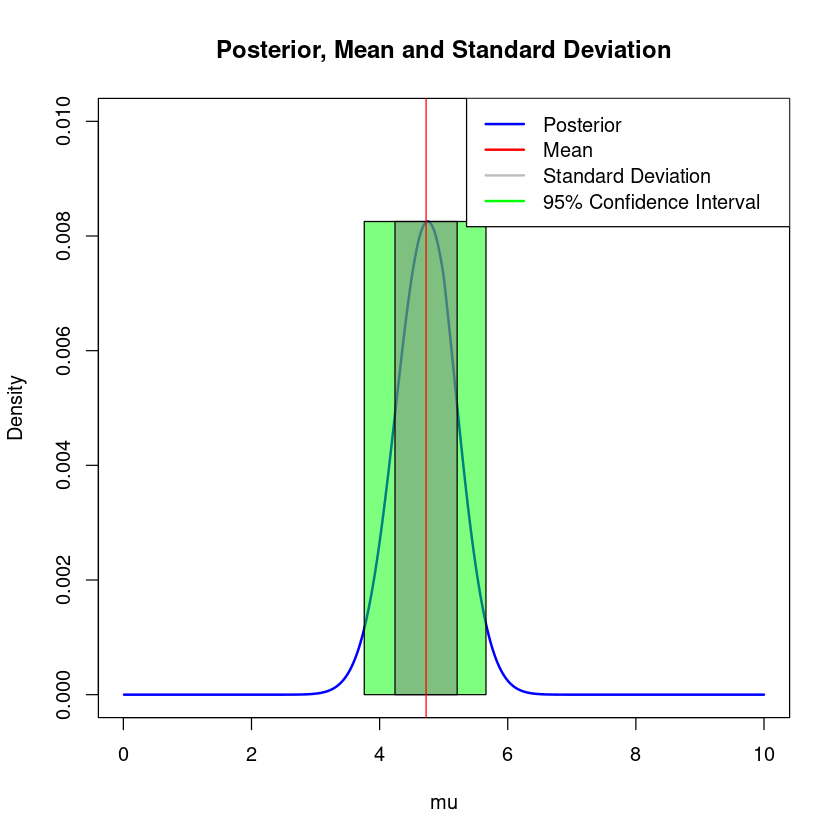

In [11]:
plot(mu, posterior, type = "l", col = "blue", lwd = 2, xlab = "mu", ylab = "Density", main =  "Posterior, Mean and Standard Deviation",ylim = c(0, 0.01))
rect(col= rgb(0,1.0,0,alpha=0.5),xleft = start,xright = end,ybottom = 0,ytop = posterior[which.max(posterior)])
rect(col= rgb(0.5,0.5,0.5,alpha=0.5),xleft = mean-std,xright =mean+std,ybottom = 0,ytop = posterior[which.max(posterior)])
abline(v=mean,col="red")
legend("topright", legend = c("Posterior", "Mean", "Standard Deviation", "95% Confidence Interval"), col = c("blue", "red", "grey", "green"), lwd = 2)

### Point 2.d

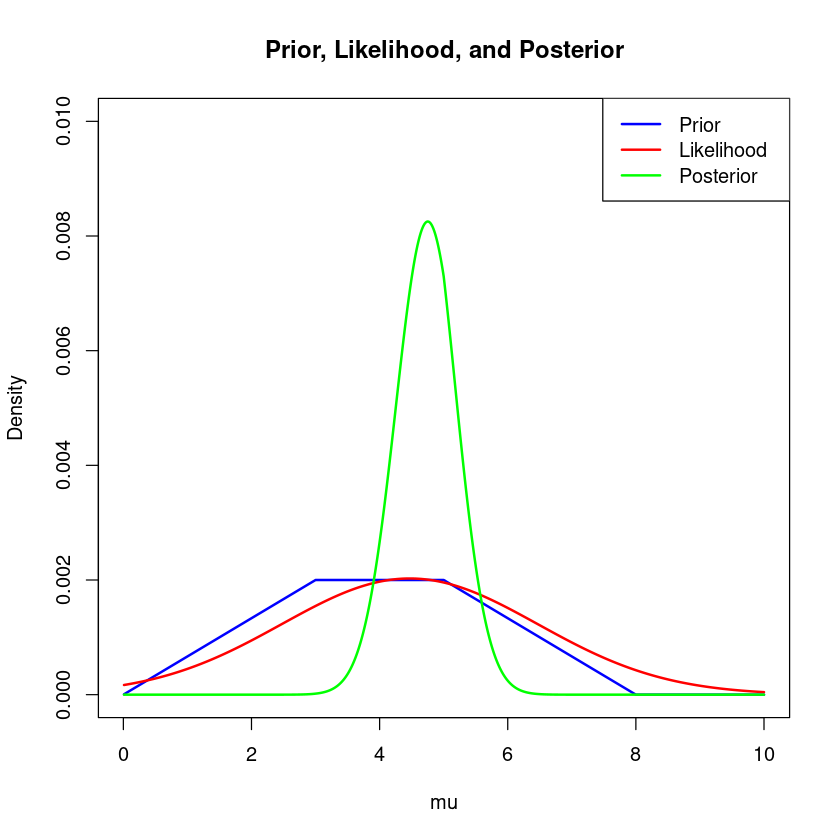

In [12]:
#plotting uniform prior and posterior
plot(mu, original_prior, type = "l", col = "blue", lwd = 2, xlab = "mu", ylab = "Density", main = "Prior, Likelihood, and Posterior",ylim = c(0, 0.01))
lines(mu, likelihood, col = "red", lwd = 2)
lines(mu, posterior, col = "green", lwd = 2)
legend("topright", legend = c("Prior", "Likelihood", "Posterior"), col = c("blue", "red", "green"), lwd = 2)

## Ex 3

### Point 3.a,3.b

In [13]:
simulate <- function(n=50,prior=c(1/6,1/6,1/6,1/6,1/6,1/6),prob=c(5/5,4/5,3/5,2/5,1/5,0/5),box_num="rand"){
    if (box_num=="rand"){
        box_num <- sample(1:length(prior), 1)
    }
    #print(box_num)
    obs<-rbinom(n=n,size=1,prob = prob[box_num])
    #print(length(obs))
    history<-list()
    for (i in seq_along(obs)){
        o<-obs[i]
        likelihood<-dbinom(x = o,size = 1,prob = prob)/sum(dbinom(x = o,size = 1,prob = prob))
        norm<-sum(likelihood*prior)
        posterior<-prior*likelihood/norm
        #cat("\n\nValue ",o)
        #cat("\nPrior:",prior)
        #cat("\nLikelihood",likelihood)
        #cat("\nPosterior",posterior)
        prior<-posterior
        history[[i]] <- posterior
    }

    history_df <- do.call(rbind, lapply(history, function(x) as.data.frame(t(x))))
    colnames(history_df) <- paste0("Posterior_", seq_along(prior))
    history_df$Iteration <- seq_len(nrow(history_df))
    history_df$Value <- obs

    return (history_df)
}

### Point 3.c

In [14]:
n=1
box_num="rand"

print(simulate(n=n,box_num=box_num))

  Posterior_1 Posterior_2 Posterior_3 Posterior_4 Posterior_5 Posterior_6
1           0  0.06666667   0.1333333         0.2   0.2666667   0.3333333
  Iteration Value
1         1     0


### Point 3.d

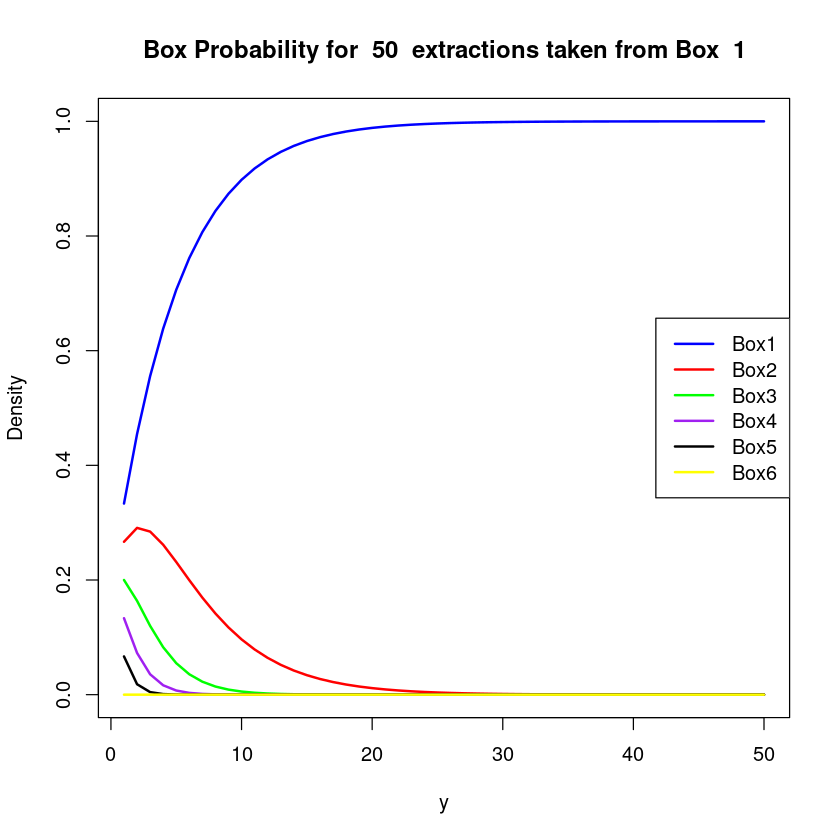

In [15]:
n=50
box_num=1

results<-simulate(n=n,box_num = box_num)

plot(results$Iteration, results$Posterior_1, type = "l", col = "blue", lwd = 2,
    xlab = "y", ylab = "Density", main = paste("Box Probability for ", n, " extractions taken from Box ", box_num), ylim = c(0, 1))
lines(results$Iteration, results$Posterior_2, col = "red", lwd = 2)
lines(results$Iteration, results$Posterior_3, col = "green", lwd = 2)
lines(results$Iteration, results$Posterior_4, col = "purple", lwd = 2)
lines(results$Iteration, results$Posterior_5, col = "black", lwd = 2)
lines(results$Iteration, results$Posterior_6, col = "yellow", lwd = 2)
legend("right", legend = c("Box1", "Box2", "Box3","Box4","Box5","Box6"), col = c("blue", "red", "green","purple","black","yellow"), lwd = 2)

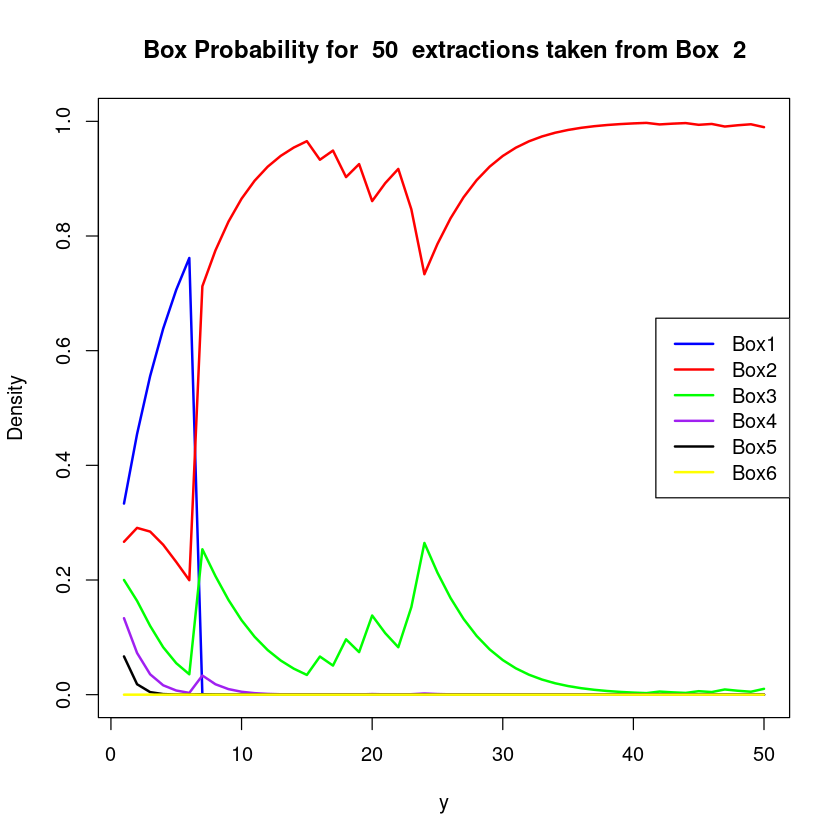

In [16]:
n=50
box_num=2

results<-simulate(n=n,box_num = box_num)

plot(results$Iteration, results$Posterior_1, type = "l", col = "blue", lwd = 2,
    xlab = "y", ylab = "Density", main = paste("Box Probability for ", n, " extractions taken from Box ", box_num), ylim = c(0, 1))
lines(results$Iteration, results$Posterior_2, col = "red", lwd = 2)
lines(results$Iteration, results$Posterior_3, col = "green", lwd = 2)
lines(results$Iteration, results$Posterior_4, col = "purple", lwd = 2)
lines(results$Iteration, results$Posterior_5, col = "black", lwd = 2)
lines(results$Iteration, results$Posterior_6, col = "yellow", lwd = 2)
legend("right", legend = c("Box1", "Box2", "Box3","Box4","Box5","Box6"), col = c("blue", "red", "green","purple","black","yellow"), lwd = 2)

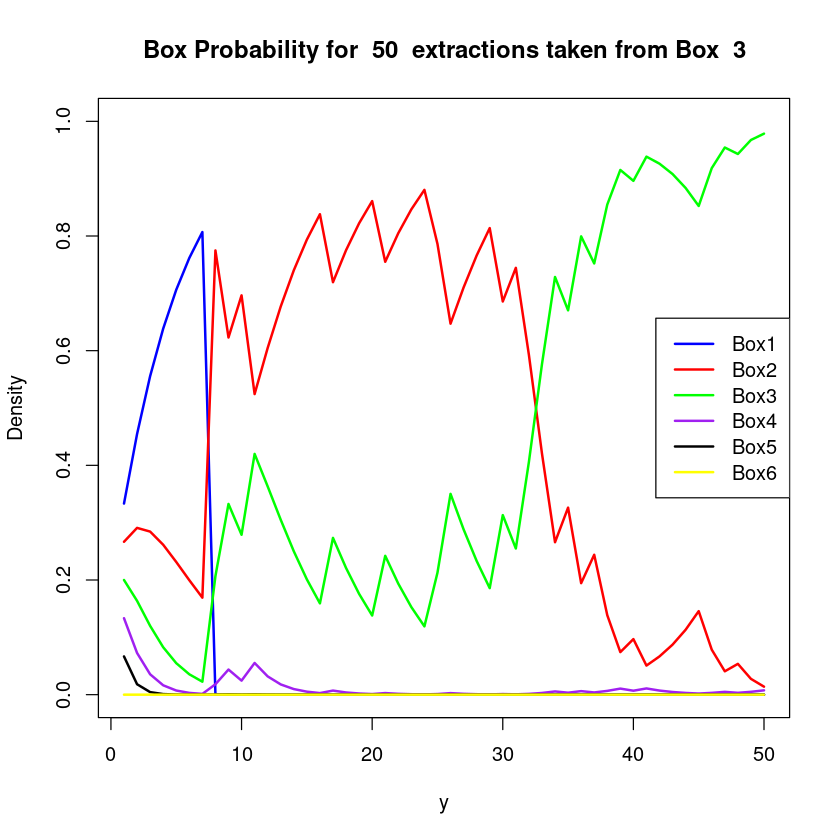

In [17]:
n=50
box_num=3

results<-simulate(n=n,box_num = box_num)

plot(results$Iteration, results$Posterior_1, type = "l", col = "blue", lwd = 2,
    xlab = "y", ylab = "Density", main = paste("Box Probability for ", n, " extractions taken from Box ", box_num), ylim = c(0, 1))
lines(results$Iteration, results$Posterior_2, col = "red", lwd = 2)
lines(results$Iteration, results$Posterior_3, col = "green", lwd = 2)
lines(results$Iteration, results$Posterior_4, col = "purple", lwd = 2)
lines(results$Iteration, results$Posterior_5, col = "black", lwd = 2)
lines(results$Iteration, results$Posterior_6, col = "yellow", lwd = 2)
legend("right", legend = c("Box1", "Box2", "Box3","Box4","Box5","Box6"), col = c("blue", "red", "green","purple","black","yellow"), lwd = 2)

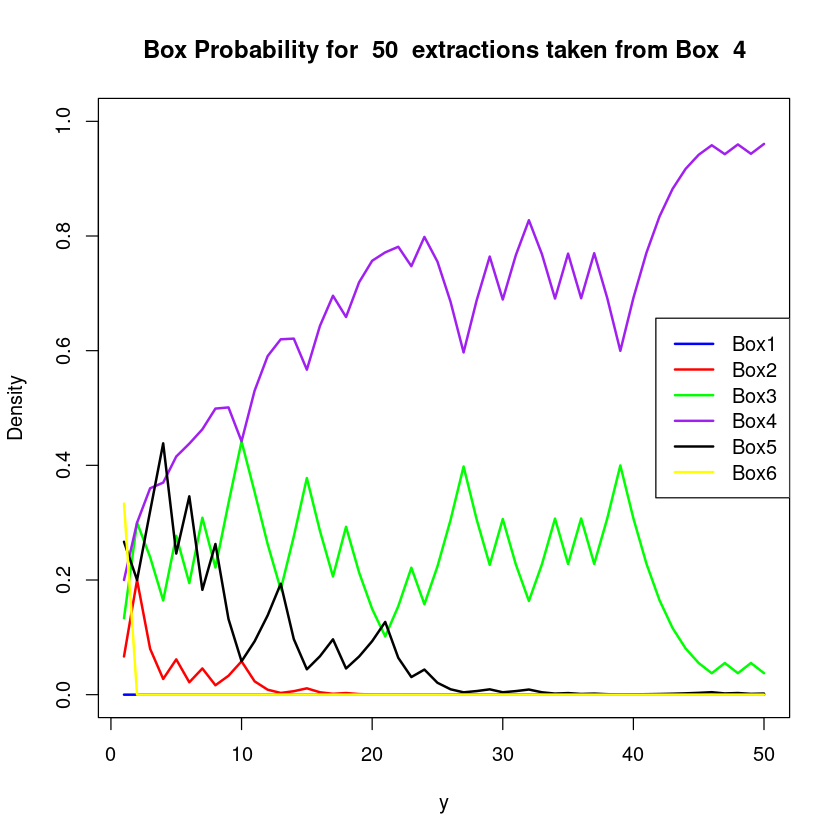

In [18]:
n=50
box_num=4

results<-simulate(n=n,box_num = box_num)

plot(results$Iteration, results$Posterior_1, type = "l", col = "blue", lwd = 2,
    xlab = "y", ylab = "Density", main = paste("Box Probability for ", n, " extractions taken from Box ", box_num), ylim = c(0, 1))
lines(results$Iteration, results$Posterior_2, col = "red", lwd = 2)
lines(results$Iteration, results$Posterior_3, col = "green", lwd = 2)
lines(results$Iteration, results$Posterior_4, col = "purple", lwd = 2)
lines(results$Iteration, results$Posterior_5, col = "black", lwd = 2)
lines(results$Iteration, results$Posterior_6, col = "yellow", lwd = 2)
legend("right", legend = c("Box1", "Box2", "Box3","Box4","Box5","Box6"), col = c("blue", "red", "green","purple","black","yellow"), lwd = 2)

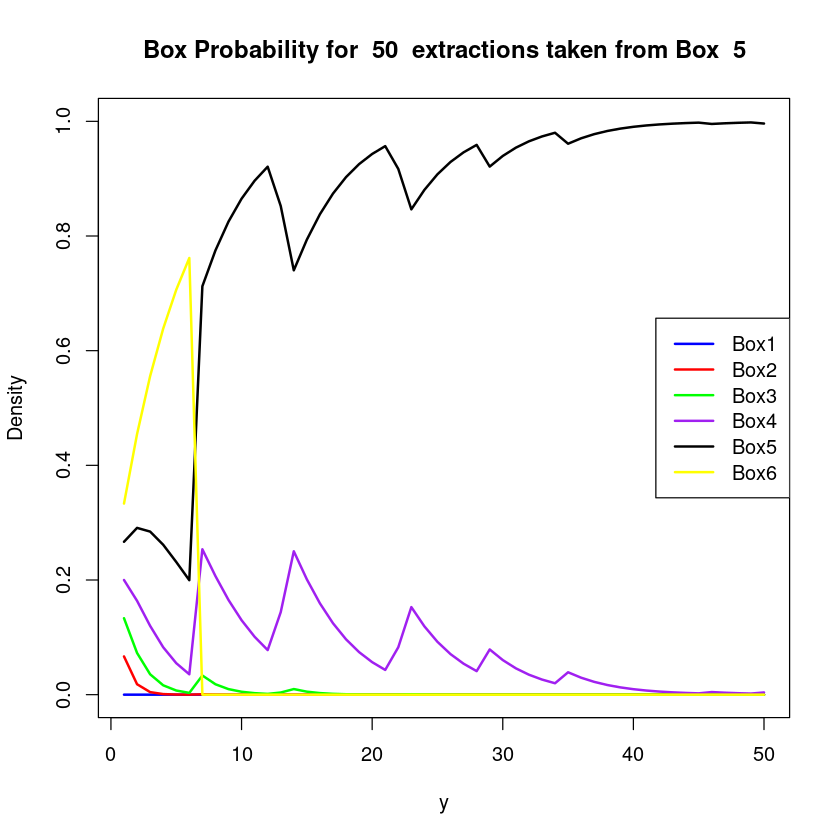

In [19]:
n=50
box_num=5

results<-simulate(n=n,box_num = box_num)

plot(results$Iteration, results$Posterior_1, type = "l", col = "blue", lwd = 2,
    xlab = "y", ylab = "Density", main = paste("Box Probability for ", n, " extractions taken from Box ", box_num), ylim = c(0, 1))
lines(results$Iteration, results$Posterior_2, col = "red", lwd = 2)
lines(results$Iteration, results$Posterior_3, col = "green", lwd = 2)
lines(results$Iteration, results$Posterior_4, col = "purple", lwd = 2)
lines(results$Iteration, results$Posterior_5, col = "black", lwd = 2)
lines(results$Iteration, results$Posterior_6, col = "yellow", lwd = 2)
legend("right", legend = c("Box1", "Box2", "Box3","Box4","Box5","Box6"), col = c("blue", "red", "green","purple","black","yellow"), lwd = 2)

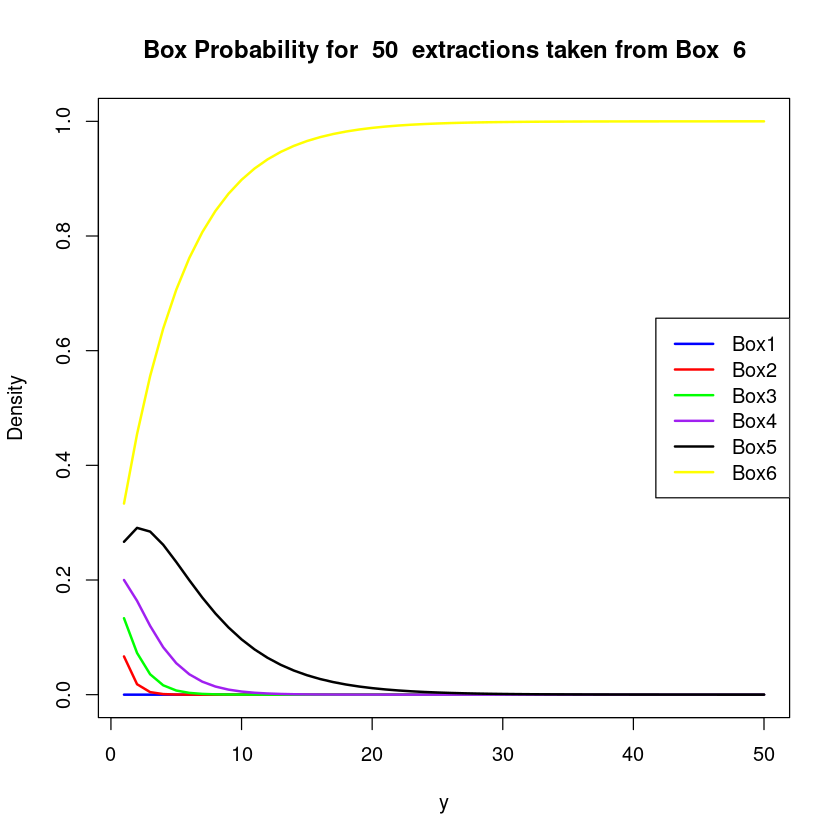

In [20]:
n=50
box_num=6

results<-simulate(n=n,box_num = box_num)

plot(results$Iteration, results$Posterior_1, type = "l", col = "blue", lwd = 2,
    xlab = "y", ylab = "Density", main = paste("Box Probability for ", n, " extractions taken from Box ", box_num), ylim = c(0, 1))
lines(results$Iteration, results$Posterior_2, col = "red", lwd = 2)
lines(results$Iteration, results$Posterior_3, col = "green", lwd = 2)
lines(results$Iteration, results$Posterior_4, col = "purple", lwd = 2)
lines(results$Iteration, results$Posterior_5, col = "black", lwd = 2)
lines(results$Iteration, results$Posterior_6, col = "yellow", lwd = 2)
legend("right", legend = c("Box1", "Box2", "Box3","Box4","Box5","Box6"), col = c("blue", "red", "green","purple","black","yellow"), lwd = 2)